# Part I. Root-finding. Newton's iteration.

In [181]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from cmath import phase

plt.style.use(['classic'])
sns.set(style="whitegrid")

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [182]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    i = -1
    for i in range(maxiter):
        i += 1
        der = fder(x)
        step = f(x) / fder(x)
        if (abs(step) <= abs(eps * x)):
            return (x, i)
        else:
            x -= step 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [183]:
def f(x):
    return x ** 2 - 1
def fder(x):
    return 2 * x

#true_result = +- 1

for x0 in np.arange(-100 + 1e-2, 100 + 1e-2, 10):
    print('Initial value x_0 = {}'.format(x0))
    root, nof_i = newton_iteration(f, fder, x0)
    print('Root: {}, took {} iterations\n'.format(root, nof_i))

Initial value x_0 = -99.99
Root: -1.0000000025438582, took 11 iterations

Initial value x_0 = -89.99
Root: -1.0000000002611635, took 11 iterations

Initial value x_0 = -79.99
Root: -1.000005509056166, took 10 iterations

Initial value x_0 = -69.99
Root: -1.0000008842645185, took 10 iterations

Initial value x_0 = -59.989999999999995
Root: -1.000000077116724, took 10 iterations

Initial value x_0 = -49.989999999999995
Root: -1.0000000025334532, took 10 iterations

Initial value x_0 = -39.989999999999995
Root: -1.000005489241104, took 9 iterations

Initial value x_0 = -29.989999999999995
Root: -1.0000000765331567, took 9 iterations

Initial value x_0 = -19.989999999999995
Root: -1.000005427933548, took 8 iterations

Initial value x_0 = -9.989999999999995
Root: -1.0000052215457234, took 7 iterations

Initial value x_0 = 0.010000000000005116
Root: 1.0000000025490745, took 11 iterations

Initial value x_0 = 10.010000000000005
Root: 1.0000053583289015, took 7 iterations

Initial value x_0 = 

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [184]:
def mod_newton(f, fder, x0, m=1, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    m : integer
        Integer constant for modification of Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    for i in range(maxiter):
        step = f(x) / fder(x)
        if (abs(step) <= abs(eps * x)):
            return (x, i)
        else:
            x -= m * step
    return (x, i)

In [185]:
def f_2(x):
    return (x ** 2 - 1) ** 2
def fder_2(x):
    return (2 * (x ** 2 - 1) * 2 * x)
#for i in range(1, 6):
#    print(mod_newton(f_2, fder_2, 2, i))
for j in [-6, 12]:
    for i in range(1, 6):
        print('Initial value x_0 = {}, m = {}'.format(j, i))
        root, nof_i = mod_newton(f_2, fder_2, j, i)
        print('Root: {}, took {} iterations\n'.format(root, nof_i))

Initial value x_0 = -6, m = 1
Root: -1.0000180390187419, took 21 iterations

Initial value x_0 = -6, m = 2
Root: -1.0000000008888648, took 6 iterations

Initial value x_0 = -6, m = 3
Root: -1.0000182268399191, took 15 iterations

Initial value x_0 = -6, m = 4
Root: -5.999999999999989, took 999 iterations

Initial value x_0 = -6, m = 5
Root: -1.2865365060988267, took 999 iterations

Initial value x_0 = 12, m = 1
Root: 1.0000122444095771, took 24 iterations

Initial value x_0 = 12, m = 2
Root: 1.0000000010340573, took 7 iterations

Initial value x_0 = 12, m = 3
Root: 1.000010168305124, took 12 iterations

Initial value x_0 = 12, m = 4
Root: 12.000000000000428, took 999 iterations

Initial value x_0 = 12, m = 5
Root: 0.3325911894942053, took 999 iterations



# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [186]:
def left_f(x):
    return np.sqrt(x)

def right_f(x):
    return (np.cos(x))

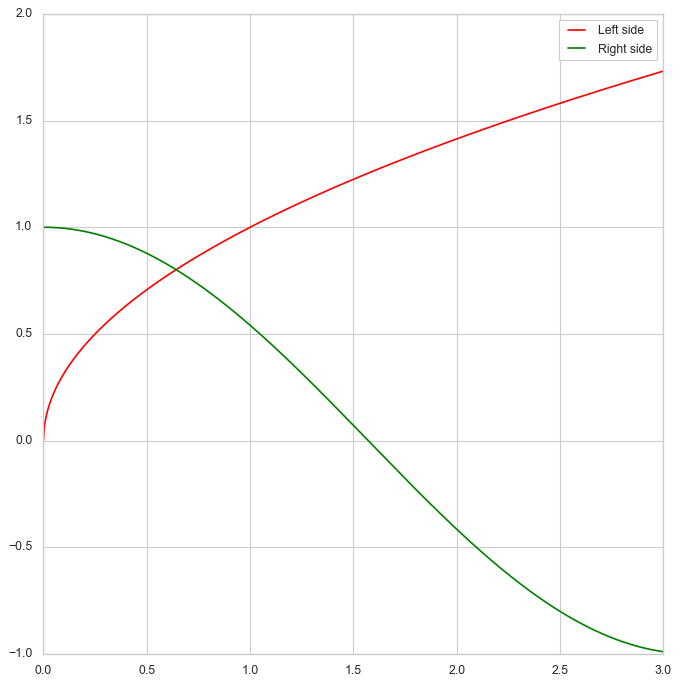

In [187]:
plt.figure(figsize = (10, 10))
x = np.linspace(0, 3, 10**3)
plt.plot(x, left_f(x), '-', color='red', label='Left side')
plt.plot(x, right_f(x), '-', color='green', label='Right side')
plt.legend()
plt.show()

In [188]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        if (abs(x - f(x)) <= eps):
            return (x, i)
        else:
            x = f(x)

In [189]:
def f_fixed_point(x):
    return np.cos(x) ** 2
fixed_point(f_fixed_point, 0)

(0.6417194456539416, 253)

In [190]:
def fixed_point_enh(f, x0, alpha, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        if (abs(alpha * f(x)) <= eps):
            return x, i
        else:
            x -= alpha * f(x)
    return x, i

In [191]:
def f_fixed_point_enh(x):
    return x - np.cos(x) ** 2

def f_der_fixed_point_enh(x):
    return 1 + 2 * np.cos(x) * np.sin(x)

In [192]:
a_array = np.linspace(2, 0, 10)[:-1]
for a in a_array:
    x_root, nof_i = fixed_point_enh(f_fixed_point_enh, 0.2, a)
    print('Alpha: {:.2f}, found root at x = {}, took {} iterations'.format(a, x_root, nof_i))
a_best = 2 / (f_der_fixed_point_enh(0.5) + f_der_fixed_point_enh(0.7))
x_root, nof_i = fixed_point_enh(f_fixed_point_enh, 0.2, a_best)
print('Estimated alpha to be best: {:.2f}, found root at x = {}, took {} iterations'.format(a_best, x_root, nof_i))

Alpha: 2.00, found root at x = -1.5817833583772412, took 999 iterations
Alpha: 1.78, found root at x = -0.5755384249039934, took 999 iterations
Alpha: 1.56, found root at x = -0.339410893323038, took 999 iterations
Alpha: 1.33, found root at x = -0.33753718287246026, took 999 iterations
Alpha: 1.11, found root at x = 0.12815763014791948, took 999 iterations
Alpha: 0.89, found root at x = 0.6417189927086574, took 37 iterations
Alpha: 0.67, found root at x = 0.6417195082757314, took 9 iterations
Alpha: 0.44, found root at x = 0.6417100780677919, took 6 iterations
Alpha: 0.22, found root at x = 0.6416962206087852, took 18 iterations
Estimated alpha to be best: 0.52, found root at x = 0.6417147884703004, took 4 iterations


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the $\textit{basins of attraction}$ of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [193]:
x = np.linspace(-2, 2, 10 ** 3)
y = 1j * x
z = np.zeros((x.shape[0], x.shape[0])) * (1 + 1j) # Test if simply 1j works
z += x
z += y.reshape(-1, 1)
for index, item in np.ndenumerate(z):
    z[index] = phase(newton_iteration(lambda x: x ** 3 - 1, lambda x: 3 * x ** 2, item)[0]) / (2 * np.pi / 3)
z = z.astype('float64')

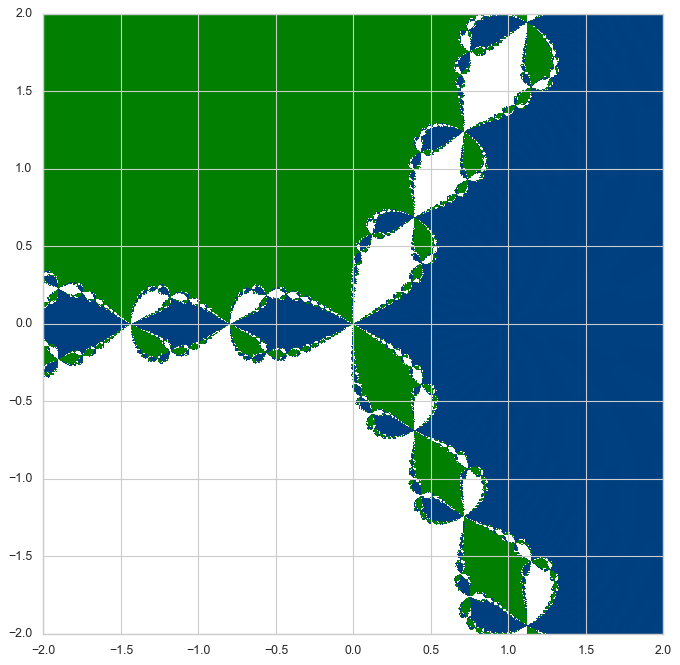

In [194]:
plt.figure(figsize=(10, 10))
plt.imshow(z, interpolation='nearest', extent=(-2, 2, -2, 2), cmap='ocean')
plt.show()